In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Suppress only RuntimeWarnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [78]:
!gdown '15_3e9du3eRDWGEOG2jwYJ1rumoxgkoct'

Downloading...
From: https://drive.google.com/uc?id=15_3e9du3eRDWGEOG2jwYJ1rumoxgkoct
To: /content/Investments_VC_colab.csv
100% 12.5M/12.5M [00:00<00:00, 37.3MB/s]


In [79]:
df = pd.read_csv('/content/Investments_VC_colab.csv',encoding='latin-1')
df.head(10)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,New York,1.0,2012-06-01,2012-06,2012-Q2,2012.0,2012-06-30,2012-06-30,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,Los Angeles,2.0,NaN,NaN,NaN,NaN,2010-06-04,2010-09-23,0.0,4000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,Tallinn,1.0,2012-10-26,2012-10,2012-Q4,2012.0,2012-08-09,2012-08-09,40000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,London,1.0,2011-04-01,2011-04,2011-Q2,2011.0,2011-04-01,2011-04-01,1500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,Fort Worth,2.0,2014-01-01,2014-01,2014-Q1,2014.0,2014-08-17,2014-09-26,0.0,0.0,60000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,/organization/club-domains,.Club Domains,http://nic.club/,|Software|,Software,"70,00,000",NaN,USA,FL,Ft. Lauderdale,Oakland Park,1.0,2011-10-10,2011-10,2011-Q4,2011.0,2013-05-31,2013-05-31,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7000000.0,0.0,0.0,0.0,0.0,0.0,0.0
6,/organization/fox-networks,.Fox Networks,http://www.dotfox.com,|Advertising|,Advertising,"49,12,393",closed,ARG,NaN,Buenos Aires,Buenos Aires,1.0,NaN,NaN,NaN,NaN,2007-01-16,2007-01-16,0.0,0.0,0.0,4912393.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,/organization/0-6-com,0-6.com,http://www.0-6.com,|Curated Web|,Curated Web,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,2007-01-01,2007-01,2007-Q1,2007.0,2008-03-19,2008-03-19,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,|Software|,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1.0,2010-01-01,2010-01,2010-Q1,2010.0,2014-07-24,2014-07-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,/organization/01games-technology,01Games Technology,http://www.01games.hk/,|Games|,Games,"41,250",operating,HKG,NaN,Hong Kong,Hong Kong,1.0,NaN,NaN,NaN,NaN,2014-07-01,2014-07-01,41250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Basic EDA

In [80]:
df.duplicated().sum()

4855

In [81]:
df = df.dropna(how='all')

In [82]:
df = df.drop_duplicates()

In [83]:
df.shape

(49438, 39)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49438 entries, 0 to 49437
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year          38

In [85]:
# Checking number of empty values in each column
df.isna().sum()/len(df)*100

,0
permalink,0.000000
name,0.002023
homepage_url,6.976415
category_list,8.012056
market,8.026215
funding_total_usd,0.000000
status,2.657875
country_code,10.665885
state_code,38.992273
region,10.665885


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
funding_rounds,49438.0,1.696205e+00,1.294213e+00,1.0,1.0,1.0,2.0,1.800000e+01
founded_year,38482.0,2.007359e+03,7.579203e+00,1902.0,2006.0,2010.0,2012.0,2.014000e+03
seed,49438.0,2.173215e+05,1.056985e+06,0.0,0.0,0.0,25000.0,1.300000e+08
venture,49438.0,7.501051e+06,2.847112e+07,0.0,0.0,0.0,5000000.0,2.351000e+09
equity_crowdfunding,49438.0,6.163322e+03,1.999048e+05,0.0,0.0,0.0,0.0,2.500000e+07
undisclosed,49438.0,1.302213e+05,2.981404e+06,0.0,0.0,0.0,0.0,2.924328e+08
convertible_note,49438.0,2.336410e+04,1.432046e+06,0.0,0.0,0.0,0.0,3.000000e+08
debt_financing,49438.0,1.888157e+06,1.382046e+08,0.0,0.0,0.0,0.0,3.007950e+10
angel,49438.0,6.541898e+04,6.582908e+05,0.0,0.0,0.0,0.0,6.359026e+07
grant,49438.0,1.628453e+05,5.612088e+06,0.0,0.0,0.0,0.0,7.505000e+08


In [87]:
df.describe(exclude=np.number).T

,count,unique,top,freq
permalink,49438,49436,/organization/treasure-valley-urology-services,2
name,49437,49350,Roost,4
homepage_url,45989,45850,http://spaceport.io,2
category_list,45477,16675,|Software|,3650
market,45470,753,Software,4620
funding_total_usd,49438,14617,-,8531
status,48124,3,operating,41829
country_code,44165,115,USA,28793
state_code,30161,61,CA,9917
region,44165,1089,SF Bay Area,6804


##Observations :
1. There are total 49436	unique permalink.
2. There are 49350 unique names of the startup in the dataset.
3. There are 753 unique market listed in the dataset.
4. There are 1089 unique regions mentioned in the dataset.
5. The dataset needs data cleaning as we can see the there are hyphens(garbage value) present in the columns.

# Helper Function

In [88]:
# Function to print basic useful details for a given column
def get_column_details(df,column):
    print("Details of",column,"column")

    #DataType of column
    print("\nDataType: ",df[column].dtype)

    #Check if null values are present
    count_null = df[column].isnull().sum()
    if count_null==0:
        print("\nThere are no null values")
    elif count_null>0:
        print("\nThere are ",count_null," null values")

    #Get Number of Unique Values
    print("\nNumber of Unique Values: ",df[column].nunique())

    #Get Distribution of Column
    print("\nDistribution of column:\n")
    print(df[column].value_counts())

# Objective Variables

In [89]:
# permalink
get_column_details(df,'permalink')

Details of permalink column

DataType:  object

There are no null values

Number of Unique Values:  49436

Distribution of column:

permalink
/organization/treasure-valley-urology-services    2
/organization/prysm                               2
/organization/waywire                             1
/organization/polybona                            1
/organization/pollfish                            1
                                                 ..
/organization/game-ventures                       1
/organization/game9z                              1
/organization/gameaccount-network                 1
/organization/gameanalytics                       1
/organization/x                                   1
Name: count, Length: 49436, dtype: int64


In [90]:
# name
get_column_details(df,'name')

Details of name column

DataType:  object

There are  1  null values

Number of Unique Values:  49350

Distribution of column:

name
Roost                  4
Spire                  4
Cue                    3
Compass                3
Hubbub                 3
                      ..
Game Trust             1
Game Ventures          1
Game9z                 1
GameAccount Network    1
[x+1]                  1
Name: count, Length: 49350, dtype: int64


In [91]:
# cleaning
# Step 1: Assign 'None' to np.NaN
df['name'] = df['name'].replace([None], np.NaN)
print("\nGarbage value 'None' is replaced with np.nan")

# Step 2: Fill missing 'name' values based on 'permalink'
df['name'] = df.apply(
    lambda row: row['permalink'].split('/')[-1].capitalize() if pd.isna(row['name']) else row['name'],
    axis=1
)

print("\nMissing values in 'name' column are filled using 'permalink'")



Garbage value 'None' is replaced with np.nan

Missing values in 'name' column are filled using 'permalink'


In [92]:
get_column_details(df,'name')

Details of name column

DataType:  object

There are no null values

Number of Unique Values:  49351

Distribution of column:

name
Roost                  4
Spire                  4
Cue                    3
Compass                3
Hubbub                 3
                      ..
Game Trust             1
Game Ventures          1
Game9z                 1
GameAccount Network    1
[x+1]                  1
Name: count, Length: 49351, dtype: int64


In [93]:
get_column_details(df,'homepage_url')

Details of homepage_url column

DataType:  object

There are  3449  null values

Number of Unique Values:  45850

Distribution of column:

homepage_url
http://spaceport.io              2
http://shelby.tv                 2
http://www.kuwo.cn               2
http://gui.de                    2
http://primordialgenetics.com    2
                                ..
http://www.gamecooks.net         1
http://www.game-craft.com        1
http://www.gamedigitalplc.com    1
http://game-insight.com          1
http://www.xplusone.com/         1
Name: count, Length: 45850, dtype: int64


In [94]:
df['homepage_url'] = df['homepage_url'].fillna("Not Available")

In [95]:
get_column_details(df,'homepage_url')

Details of homepage_url column

DataType:  object

There are no null values

Number of Unique Values:  45851

Distribution of column:

homepage_url
Not Available                    3449
http://spaceport.io                 2
http://ivillage.com                 2
http://www.kuwo.cn                  2
http://gui.de                       2
                                 ... 
http://www.gamecooks.net            1
http://www.game-craft.com           1
http://www.gamedigitalplc.com       1
http://game-insight.com             1
http://www.xplusone.com/            1
Name: count, Length: 45851, dtype: int64


In [96]:
# category list
get_column_details(df,'category_list')

Details of category_list column

DataType:  object

There are  3961  null values

Number of Unique Values:  16675

Distribution of column:

category_list
|Software|                                                                                     3650
|Biotechnology|                                                                                3597
|E-Commerce|                                                                                   1263
|Mobile|                                                                                       1211
|Curated Web|                                                                                  1120
                                                                                               ... 
|Fashion|Digital Media|Marketplaces|E-Commerce|                                                   1
|Advertising|Web Development|App Marketing|Enterprises|Cloud Computing|Enterprise Software|       1
|Web Design|Software|Web Tools|Web Development

In [97]:
df['category_list'] = df['category_list'].fillna("Not Listed")

In [98]:
get_column_details(df,'category_list')

Details of category_list column

DataType:  object

There are no null values

Number of Unique Values:  16676

Distribution of column:

category_list
Not Listed                                                                                     3961
|Software|                                                                                     3650
|Biotechnology|                                                                                3597
|E-Commerce|                                                                                   1263
|Mobile|                                                                                       1211
                                                                                               ... 
|Fashion|Digital Media|Marketplaces|E-Commerce|                                                   1
|Advertising|Web Development|App Marketing|Enterprises|Cloud Computing|Enterprise Software|       1
|Web Design|Software|Web Tools|Web Development|Ent

In [99]:
get_column_details(df,' market ')

Details of  market  column

DataType:  object

There are  3968  null values

Number of Unique Values:  753

Distribution of column:

 market 
Software                4620
Biotechnology           3688
Mobile                  1983
E-Commerce              1805
Curated Web             1655
                        ... 
Contact Centers            1
Swimming                   1
Retirement                 1
Musical Instruments        1
Rural Energy               1
Name: count, Length: 753, dtype: int64


In [100]:
df[' market '] = df[' market '].fillna("Not Listed")

In [101]:
get_column_details(df,' market ')

Details of  market  column

DataType:  object

There are no null values

Number of Unique Values:  754

Distribution of column:

 market 
 Software                4620
Not Listed               3968
 Biotechnology           3688
 Mobile                  1983
 E-Commerce              1805
                         ... 
 Contact Centers            1
 Swimming                   1
 Retirement                 1
 Musical Instruments        1
 Rural Energy               1
Name: count, Length: 754, dtype: int64


In [102]:
get_column_details(df,' funding_total_usd ')

Details of  funding_total_usd  column

DataType:  object

There are no null values

Number of Unique Values:  14617

Distribution of column:

 funding_total_usd 
-               8531
10,00,000        925
5,00,000         761
1,00,000         749
40,000           680
                ... 
1,79,26,365        1
1,77,404           1
2,52,052           1
2,15,563           1
97,398             1
Name: count, Length: 14617, dtype: int64


In [103]:
# Replace commas with empty strings
df[' funding_total_usd '] = df[' funding_total_usd '].str.replace(',', '', regex=True)

# Convert to numeric if needed
df[' funding_total_usd '] = pd.to_numeric(df[' funding_total_usd '], errors='coerce')

In [104]:
df[' funding_total_usd '] = df[' funding_total_usd '].fillna(0)

In [105]:
get_column_details(df,' funding_total_usd ')

Details of  funding_total_usd  column

DataType:  float64

There are no null values

Number of Unique Values:  14617

Distribution of column:

 funding_total_usd 
0.0           8531
1000000.0      925
500000.0       761
100000.0       749
40000.0        680
              ... 
17926365.0       1
177404.0         1
252052.0         1
215563.0         1
97398.0          1
Name: count, Length: 14617, dtype: int64


In [106]:
get_column_details(df,'status')

Details of status column

DataType:  object

There are  1314  null values

Number of Unique Values:  3

Distribution of column:

status
operating    41829
acquired      3692
closed        2603
Name: count, dtype: int64


In [107]:
df['status'] = df['status'].fillna("Not Available")

In [108]:
get_column_details(df,'status')

Details of status column

DataType:  object

There are no null values

Number of Unique Values:  4

Distribution of column:

status
operating        41829
acquired          3692
closed            2603
Not Available     1314
Name: count, dtype: int64


In [109]:
# Update the specified columns to "Not Available"
df['country_code'] = df['country_code'].fillna('Not Available')
df['state_code'] = df['state_code'].fillna('Not Available')
df['region'] = df['region'].fillna('Not Available')
df['city'] = df['city'].fillna('Not Available')

In [110]:
get_column_details(df,'country_code')

Details of country_code column

DataType:  object

There are no null values

Number of Unique Values:  116

Distribution of column:

country_code
USA              28793
Not Available     5273
GBR               2642
CAN               1405
CHN               1239
DEU                968
FRA                866
IND                849
ISR                682
ESP                549
RUS                368
SWE                315
AUS                314
ITA                308
NLD                307
IRL                306
SGP                299
BRA                293
CHL                285
JPN                284
KOR                246
CHE                222
DNK                210
FIN                194
BEL                149
ARG                149
HKG                126
TUR                124
AUT                103
NOR                 98
POL                 94
MEX                 83
PRT                 69
BGR                 68
ARE                 66
NZL                 62
ZAF                 52
IDN

In [111]:
get_column_details(df,'state_code')

Details of state_code column

DataType:  object

There are no null values

Number of Unique Values:  62

Distribution of column:

state_code
Not Available    19277
CA                9917
NY                2914
MA                1969
TX                1466
WA                 974
FL                 963
IL                 827
PA                 792
CO                 723
ON                 653
NJ                 579
VA                 553
GA                 541
OH                 532
MD                 493
NC                 476
TN                 411
UT                 365
MN                 355
AZ                 327
BC                 318
CT                 316
MI                 313
OR                 312
IN                 233
MO                 220
QC                 219
NV                 195
WI                 191
DC                 182
AR                 177
SC                 125
AB                 115
KY                 113
NH                 112
AL                 105
RI      

In [112]:
get_column_details(df,'region')

Details of region column

DataType:  object

There are no null values

Number of Unique Values:  1090

Distribution of column:

region
SF Bay Area        6804
Not Available      5273
New York City      2577
Boston             1837
London             1588
                   ... 
Palma Del Río         1
Harbin                1
Teddington            1
Borehamwood           1
Buckinghamshire       1
Name: count, Length: 1090, dtype: int64


In [113]:
get_column_details(df,'city')

Details of city column

DataType:  object

There are no null values

Number of Unique Values:  4189

Distribution of column:

city
Not Available            6116
San Francisco            2615
New York                 2334
London                   1257
Palo Alto                 597
                         ... 
Pekin                       1
Fort Ripley                 1
Chelyabinsk-40              1
Yavneh                      1
Damansara New Village       1
Name: count, Length: 4189, dtype: int64


In [114]:
get_column_details(df,'funding_rounds')

Details of funding_rounds column

DataType:  float64

There are no null values

Number of Unique Values:  17

Distribution of column:

funding_rounds
1.0     32039
2.0      9219
3.0      4026
4.0      1997
5.0      1001
6.0       560
7.0       252
8.0       152
9.0        84
10.0       43
11.0       35
12.0       12
13.0        8
15.0        4
14.0        4
16.0        1
18.0        1
Name: count, dtype: int64


In [115]:
df['founded_at'] = pd.to_datetime(df['founded_at'], errors='coerce')

In [116]:
get_column_details(df,'founded_at')

Details of founded_at column

DataType:  datetime64[ns]

There are  10885  null values

Number of Unique Values:  3368

Distribution of column:

founded_at
2012-01-01    2181
2011-01-01    2161
2010-01-01    1855
2009-01-01    1603
2013-01-01    1575
              ... 
2006-06-19       1
2002-11-20       1
2008-08-26       1
2003-05-29       1
2012-05-13       1
Name: count, Length: 3368, dtype: int64


In [117]:
df['founded_at'] = df['founded_at'].fillna('Not Available')
df['founded_month'] = df['founded_month'].fillna('Not Available')
df['founded_quarter'] = df['founded_quarter'].fillna('Not Available')
df['founded_year'] = df['founded_year'].fillna('Not Available')

In [118]:
get_column_details(df,'founded_at')

Details of founded_at column

DataType:  object

There are no null values

Number of Unique Values:  3369

Distribution of column:

founded_at
Not Available          10885
2012-01-01 00:00:00     2181
2011-01-01 00:00:00     2161
2010-01-01 00:00:00     1855
2009-01-01 00:00:00     1603
                       ...  
2009-09-22 00:00:00        1
2009-05-24 00:00:00        1
1983-12-31 00:00:00        1
2009-02-19 00:00:00        1
2012-05-13 00:00:00        1
Name: count, Length: 3369, dtype: int64


In [119]:
get_column_details(df,'founded_month')

Details of founded_month column

DataType:  object

There are no null values

Number of Unique Values:  421

Distribution of column:

founded_month
Not Available    10956
2012-01           2327
2011-01           2286
2010-01           1952
2013-01           1722
2009-01           1655
2007-01           1394
2008-01           1336
2006-01           1159
2005-01           1026
2004-01            933
2003-01            778
2000-01            761
2002-01            671
1999-01            644
2001-01            644
2014-01            543
1998-01            377
1997-01            326
2012-06            306
2012-03            292
2012-04            286
2012-02            285
2012-05            273
2011-06            272
1996-01            271
2011-11            270
2011-05            259
2011-03            258
2012-09            257
2012-10            256
2012-07            255
2012-08            254
2013-03            254
2011-09            248
2013-04            241
2013-06            241
2

In [120]:
get_column_details(df,'founded_quarter')

Details of founded_quarter column

DataType:  object

There are no null values

Number of Unique Values:  219

Distribution of column:

founded_quarter
Not Available    10956
2012-Q1           2904
2011-Q1           2768
2010-Q1           2259
2013-Q1           2206
2009-Q1           1852
2007-Q1           1560
2008-Q1           1523
2006-Q1           1264
2005-Q1           1099
2004-Q1            965
2012-Q2            865
2014-Q1            850
2003-Q1            814
2000-Q1            794
2012-Q3            766
2011-Q2            763
2013-Q2            719
2011-Q3            699
2002-Q1            695
2012-Q4            676
2011-Q4            675
2001-Q1            663
1999-Q1            662
2013-Q3            609
2013-Q4            510
2010-Q2            508
2010-Q4            506
2010-Q3            500
2009-Q3            401
1998-Q1            391
2014-Q2            375
2009-Q2            369
2009-Q4            357
1997-Q1            330
2008-Q2            292
2008-Q3            2

In [121]:
get_column_details(df,'founded_year')

Details of founded_year column

DataType:  object

There are no null values

Number of Unique Values:  104

Distribution of column:

founded_year
Not Available    10956
2012.0            5211
2011.0            4905
2013.0            4044
2010.0            3773
2009.0            2979
2008.0            2348
2007.0            2331
2006.0            1807
2014.0            1469
2005.0            1418
2004.0            1156
2003.0             965
2000.0             888
2002.0             788
1999.0             758
2001.0             741
1998.0             437
1997.0             359
1996.0             304
1995.0             224
1994.0             156
1993.0             129
1992.0             115
1991.0              92
1989.0              91
1990.0              87
1985.0              77
1988.0              73
1984.0              69
1987.0              68
1986.0              66
1983.0              60
1980.0              41
1981.0              40
1982.0              33
1979.0              31
197

In [122]:
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')

In [123]:
df['first_funding_at'] = df['first_funding_at'].fillna('Not Available')
df['last_funding_at'] = df['last_funding_at'].fillna('Not Available')

In [124]:
get_column_details(df,'first_funding_at')

Details of first_funding_at column

DataType:  object

There are no null values

Number of Unique Values:  3905

Distribution of column:

first_funding_at
2012-01-01    468
2013-01-01    463
2008-01-01    422
2011-01-01    392
2007-01-01    342
             ... 
1999-08-31      1
2013-12-07      1
2004-08-25      1
2003-12-12      1
2004-10-12      1
Name: count, Length: 3905, dtype: int64


In [125]:
get_column_details(df,'last_funding_at')

Details of last_funding_at column

DataType:  object

There are no null values

Number of Unique Values:  3652

Distribution of column:

last_funding_at
2013-01-01    387
2014-01-01    364
2012-01-01    348
2008-01-01    302
2011-01-01    272
             ... 
2005-05-14      1
2005-09-03      1
1986-07-03      1
2009-05-24      1
2008-07-13      1
Name: count, Length: 3652, dtype: int64


In [126]:
cols = ['seed','venture','equity_crowdfunding','undisclosed','convertible_note','debt_financing','angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A', 'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']
for col in cols:
    get_column_details(df,col)


Details of seed column

DataType:  float64

There are no null values

Number of Unique Values:  3337

Distribution of column:

seed
0.0          35598
40000.0        654
1000000.0      570
500000.0       543
100000.0       538
             ...  
2546269.0        1
6400000.0        1
4875000.0        1
765120.0         1
9300000.0        1
Name: count, Length: 3337, dtype: int64
Details of venture column

DataType:  float64

There are no null values

Number of Unique Values:  9300

Distribution of column:

venture
0.0           26161
10000000.0      493
5000000.0       487
1000000.0       470
2000000.0       422
              ...  
14130737.0        1
5666100.0         1
26787093.0        1
242132.0          1
1587301.0         1
Name: count, Length: 9300, dtype: int64
Details of equity_crowdfunding column

DataType:  float64

There are no null values

Number of Unique Values:  252

Distribution of column:

equity_crowdfunding
0.0           48916
100000.0         22
50000.0          19


##Feature Engineering

In [127]:
# Startup age and funding velocity
current_year = pd.Timestamp.now().year
# Convert 'founded_year' column to numeric, handling errors
df['founded_year'] = pd.to_numeric(df['founded_year'], errors='coerce')
df['Age_of_startup'] = current_year - df['founded_year']
df['Funding_velocity'] = df[' funding_total_usd '] / df['Age_of_startup']

# Advance EDA

<ipython-input-128-14b14de528f7>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_by_total, x='total_funding', y='category_list', palette='viridis')


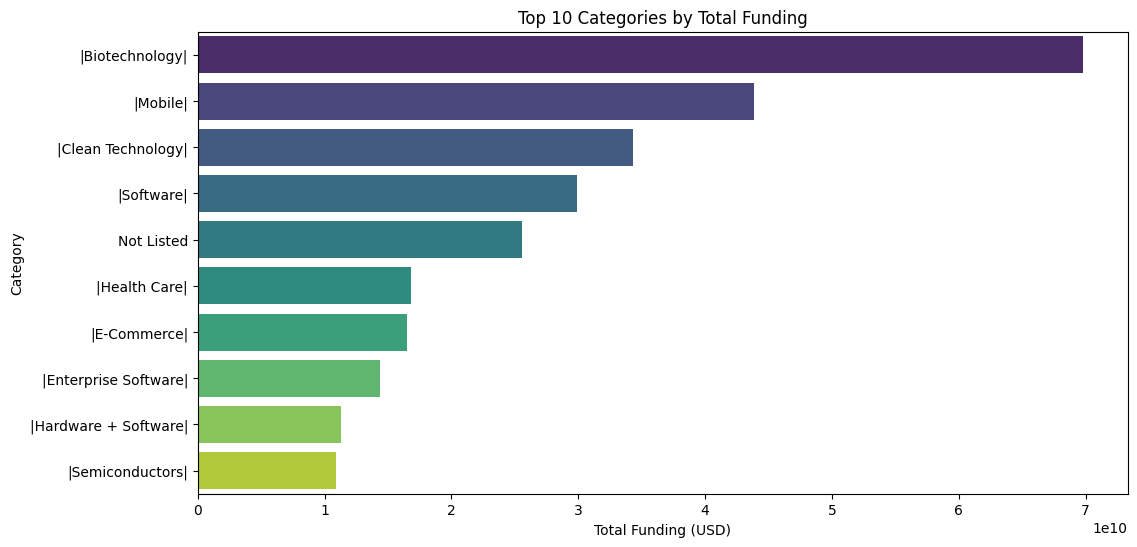

<ipython-input-128-14b14de528f7>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_by_average, x='average_funding', y='category_list', palette='coolwarm')


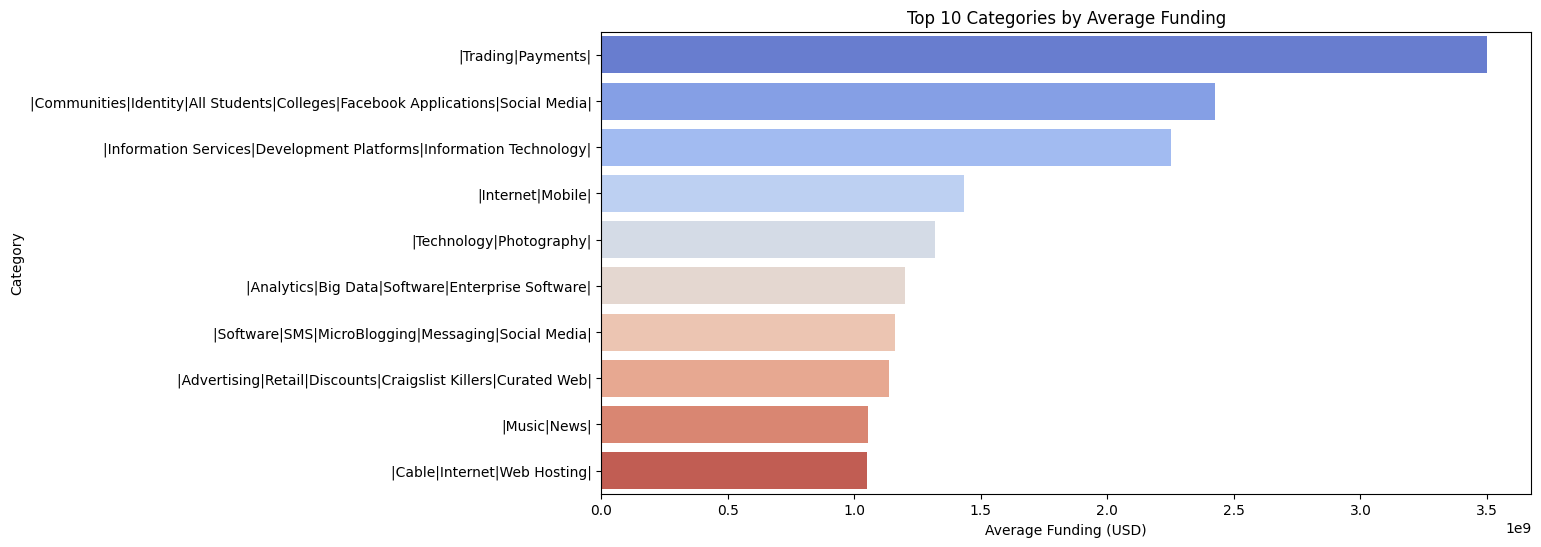

In [128]:
# Total funding by category, avg funding in each category
# Group by category and calculate total and average funding
category_funding = df.groupby('category_list')[' funding_total_usd '].agg(['sum', 'mean']).reset_index()
category_funding.rename(columns={'sum': 'total_funding', 'mean': 'average_funding'}, inplace=True)

# Create separate variables for total and average funding
top_by_total = category_funding.sort_values('total_funding', ascending=False).head(10)
top_by_average = category_funding.sort_values('average_funding', ascending=False).head(10)

# Plot Total Funding
plt.figure(figsize=(12, 6))
sns.barplot(data=top_by_total, x='total_funding', y='category_list', palette='viridis')
plt.title('Top 10 Categories by Total Funding')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Category')
plt.show()

# Plot Average Funding
plt.figure(figsize=(12, 6))
sns.barplot(data=top_by_average, x='average_funding', y='category_list', palette='coolwarm')
plt.title('Top 10 Categories by Average Funding')
plt.xlabel('Average Funding (USD)')
plt.ylabel('Category')
plt.show()

Insight:
1. Categories like Biotechnology, Mobile, Clean Technology, Software often top funding charts by Total funding, highlighting investor focus on technology-driven industries. The most funding is done for Biotechnology about 70 Billion Dollars.
2. Categories like Trading, Payments, Communities, college, students, social media often top funding charts by Average funding.The most avg funding is done for Trading & Payments about 3.5 Billion dollars.

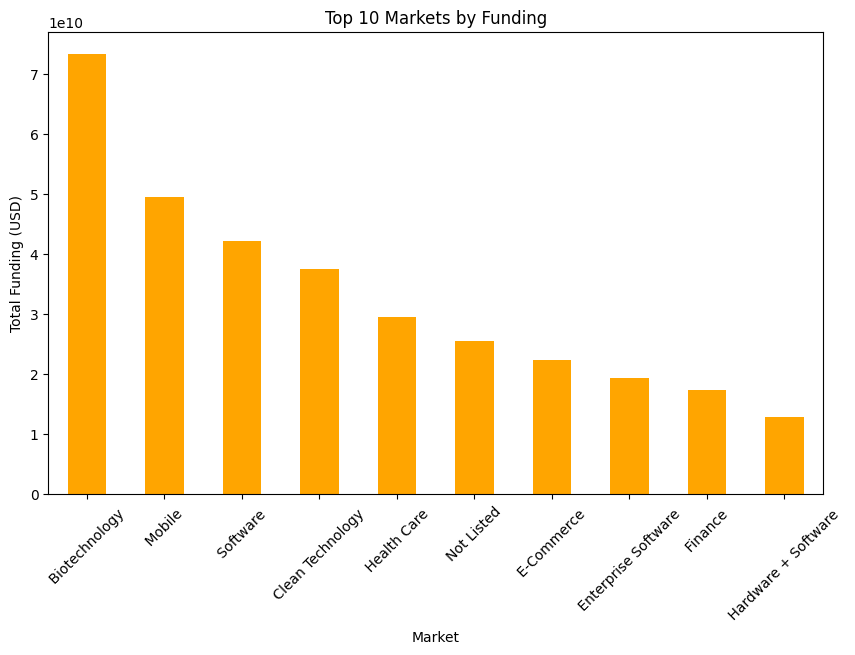

In [129]:
#Funding by Market
market_funding = df.groupby(' market ')[' funding_total_usd '].sum().sort_values(ascending=False).head(10)
market_funding.plot(kind='bar', figsize=(10, 6), color='orange')
plt.title('Top 10 Markets by Funding')
plt.xlabel('Market')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.show()

Insight: Markets such as Biotechnology, Mobile, Clean Technology, Software are among the most funded, reflecting their critical importance during recent economic trends. Biotechnology market has funded the most about 73 Billion dollars.

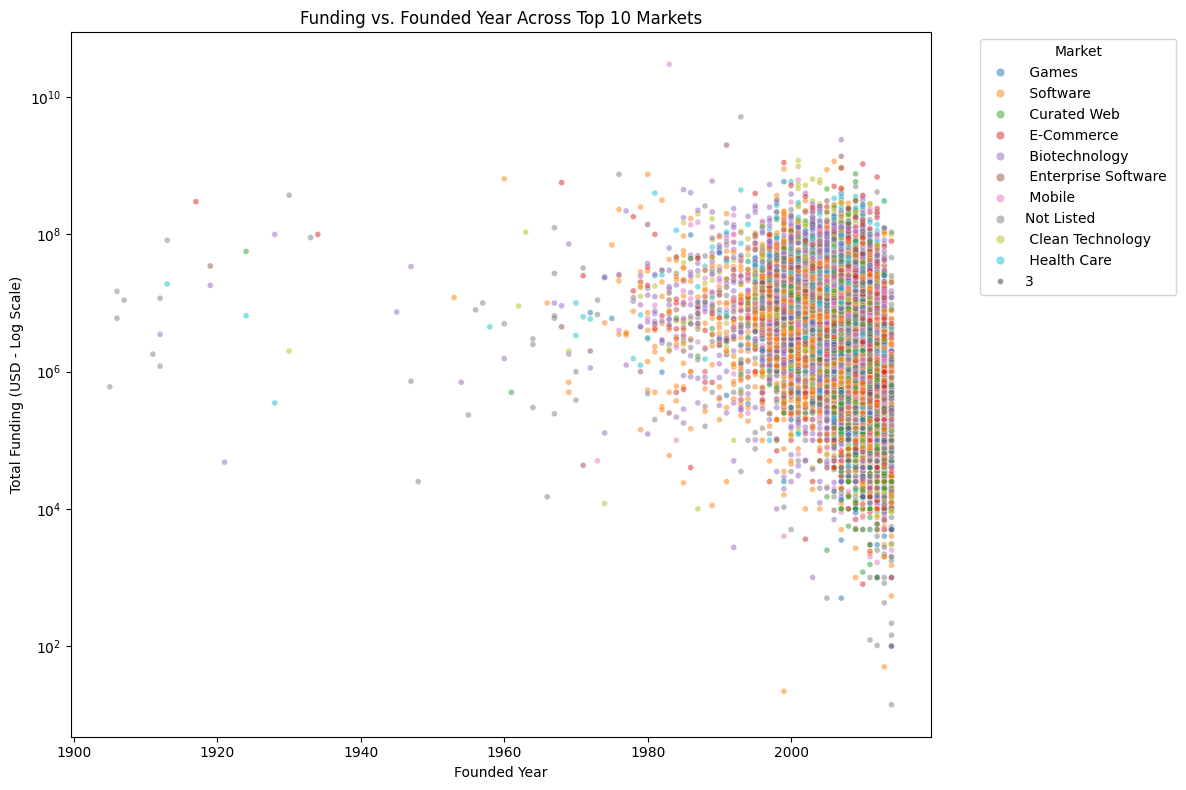

In [130]:
# Select the top 10 most frequent markets
top_markets = df[' market '].value_counts().head(10).index.tolist()

# Filter the data
filtered_df = df[df[' market '].isin(top_markets)]

# Create the scatter plot with the filtered data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=filtered_df,
                x='founded_year',
                y=' funding_total_usd ',
                hue=' market ',
                alpha=0.5,
                size=3)

# Set the y-axis to logarithmic scale
plt.yscale('log')

# Add title and labels
plt.title('Funding vs. Founded Year Across Top 10 Markets')
plt.xlabel('Founded Year')
plt.ylabel('Total Funding (USD - Log Scale)')

# Adjust legend location if necessary
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

Insight: The most striking insight is the dramatic surge in startup formation and funding post-1980s, with the peak funding reaching approximately 10 billion dollars (10^10) for top performers, particularly in Mobile and Biotechnology sectors, while the majority of startups receive funding between 1 million dollars(10^6) and 100 million dollars(10^8), demonstrating a significant expansion in the startup ecosystem during this four-decade period (1980-2020).

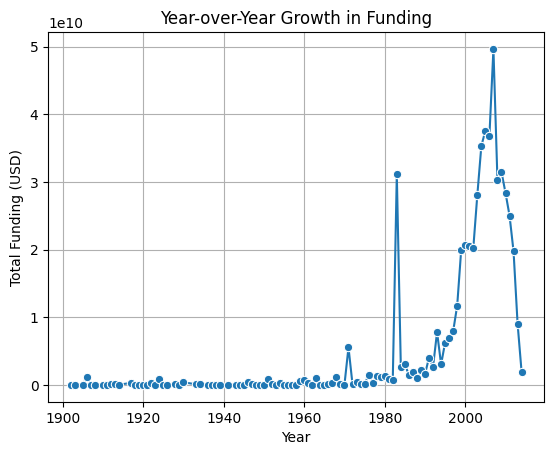

In [131]:
#Year-over-Year Growth in Funding
yearly_funding = df.groupby('founded_year')[' funding_total_usd '].sum().reset_index()
sns.lineplot(data=yearly_funding, x='founded_year', y=' funding_total_usd ', marker='o')
plt.title('Year-over-Year Growth in Funding')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.grid(True)
plt.show()

Insight:
1. Startup funding experienced a dramatic surge around 2000-2005, reaching a peak of approximately $50 billion, followed by significant volatility, aligning with the dot-com bubble and subsequent recovery.
2. Prior to the late 1980s, startup funding was minimal, indicating a significant shift in the investment landscape over the past few decades.

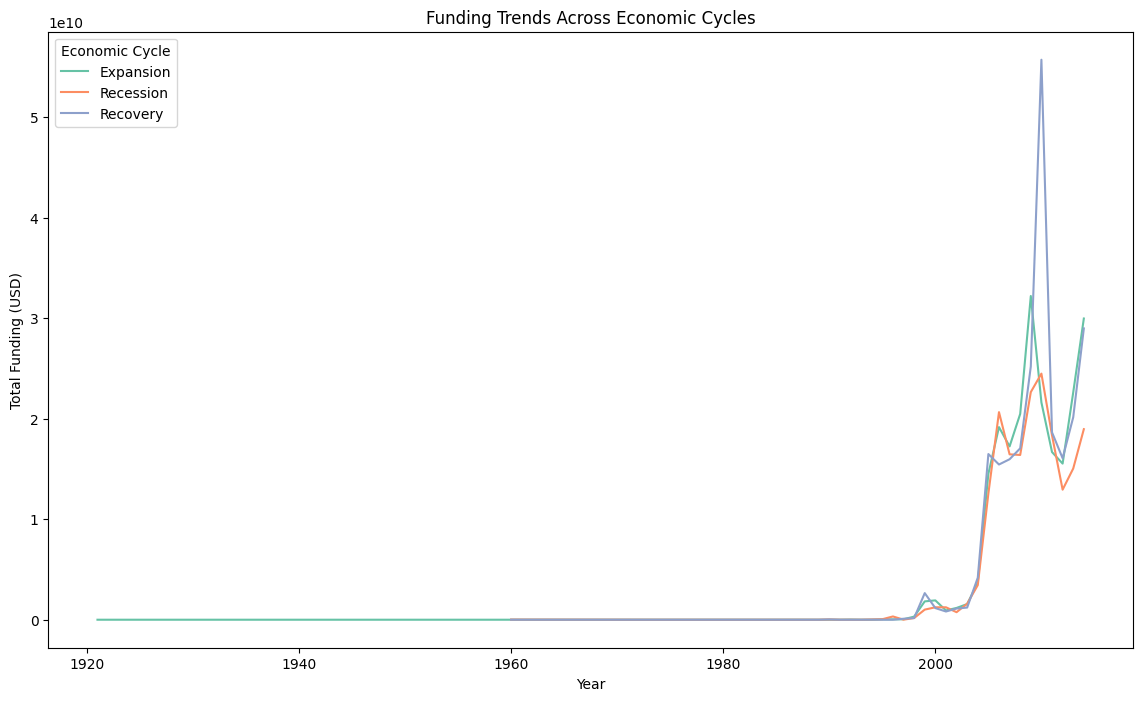

In [132]:
# Year-over-Year Funding Trends During Economic Cycles
# Add hypothetical economic cycle data
df['economic_cycle'] = ['Expansion', 'Recession', 'Recovery'] * (len(df) // 3) + ['Expansion'] * (len(df) % 3)

# Creating feature
df['funding_year'] = pd.to_datetime(df['first_funding_at'], errors='coerce').dt.year

# Group by funding year and economic cycle
economic_cycle_funding = df.groupby(['economic_cycle', 'funding_year'])[' funding_total_usd '].sum().reset_index()

# Visualization
plt.figure(figsize=(14, 8))
sns.lineplot(x='funding_year', y=' funding_total_usd ', hue='economic_cycle', data=economic_cycle_funding, palette='Set2')
plt.title('Funding Trends Across Economic Cycles')
plt.xlabel('Year')
plt.ylabel('Total Funding (USD)')
plt.legend(title='Economic Cycle')
plt.show()

Insight:
1. Startup funding exhibits a strong correlation with economic cycles, peaking during Recovery periods (approximately 55 billion) and reaching its lowest point during Recession periods (25 billion).
2. Before 1990, funding activity across all economic cycles was minimal, highlighting the significant growth and volatility of the startup funding landscape in recent decades.

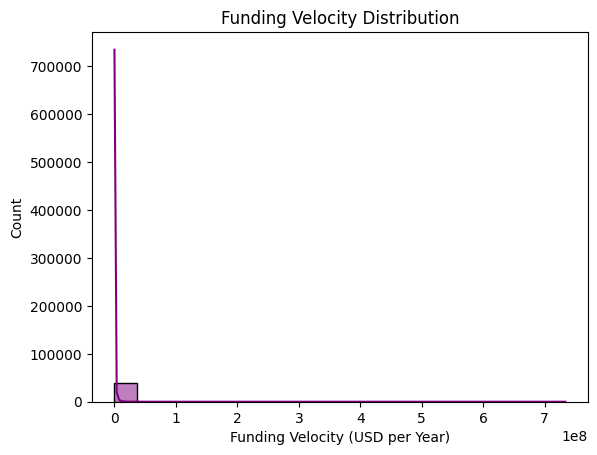

In [133]:
# Funding Velocity
sns.histplot(df['Funding_velocity'], bins=20, kde=True, color='purple')
plt.title('Funding Velocity Distribution')
plt.xlabel('Funding Velocity (USD per Year)')
plt.ylabel('Count')
plt.show()

Insight:
1. The distribution of funding velocity is highly skewed, with the majority of startups (approximately 700,000) having near-zero funding velocity.
2. Only a small fraction of startups achieve rapid funding acceleration, with the maximum funding velocity reaching around 7x10^8 USD per year.









In [134]:
# Calculate the count of startups in each market
market_counts = df[' market '].value_counts()

# Define thresholds
niche_threshold = 2  # Example: Markets with ≤2 startups are considered "Niche"
generalist_threshold = 3  # Markets with >2 startups are "Generalist"

# Add a column for Niche/Generalist classification
df['segment_type'] = df[' market '].apply(
    lambda x: 'Niche' if market_counts[x] <= niche_threshold else 'Generalist'
)

In [135]:
# Niche vs. Generalist Segments
# Calculate average funding for Niche and Generalist segments
niche_funding = df[df['segment_type'] == 'Niche'][' funding_total_usd '].mean()
generalist_funding = df[df['segment_type'] == 'Generalist'][' funding_total_usd '].mean()

print(f"Average funding for Niche segments: ${niche_funding:,.2f}")
print(f"Average funding for Generalist segments: ${generalist_funding:,.2f}")

Average funding for Niche segments: $9,399,979.49
Average funding for Generalist segments: $13,183,965.45


<ipython-input-136-38612e837d8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='segment_type', y=' funding_total_usd ', data=df, palette='Set2')


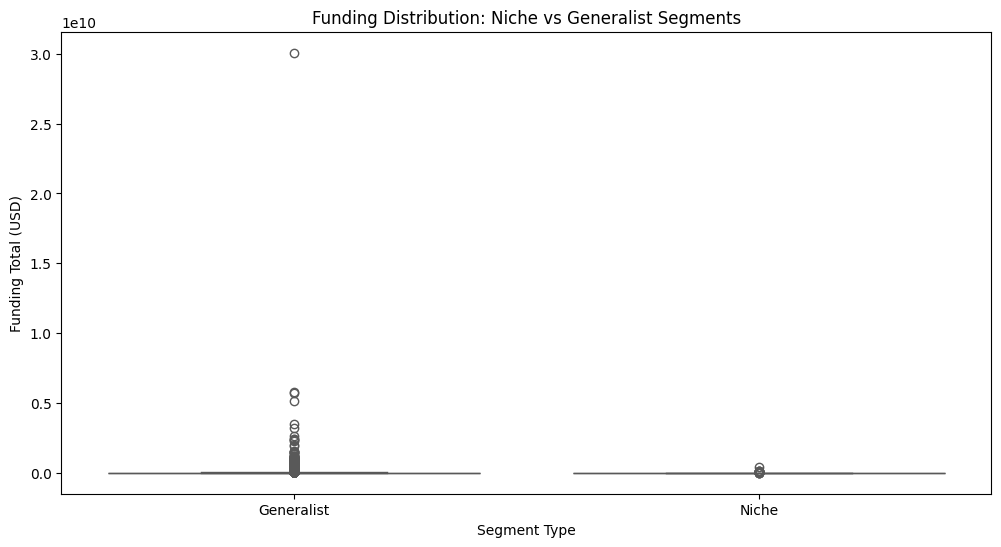

In [136]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='segment_type', y=' funding_total_usd ', data=df, palette='Set2')
plt.title('Funding Distribution: Niche vs Generalist Segments')
plt.xlabel('Segment Type')
plt.ylabel('Funding Total (USD)')
plt.show()

Insight:
1. While both niche and generalist segments have similar median funding levels, generalist segments exhibit a wider range of funding amounts, with some outliers reaching significantly higher values (up to 30 billion USD).
2. Niche segments tend to have a more concentrated funding distribution, with fewer high-value outliers and a maximum funding level around 1 billion USD.

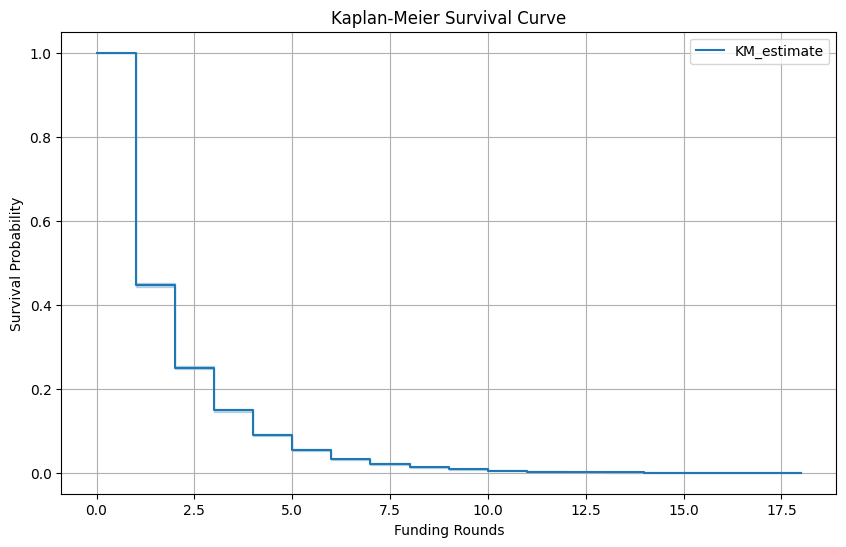

In [137]:
#Survival Analysis Using Kaplan-Meier Estimator
!pip install lifelines
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(df['funding_rounds'], event_observed=(df['status'] == 'operating'))

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Funding Rounds')
plt.ylabel('Survival Probability')
plt.grid(True)
plt.show()

Insight:
1. Startup survival probability decreases significantly after each funding round, with a sharp drop after the first round and continuing decline until around the fifth round.
2. The majority of startups fail to secure continued funding beyond the early stages, with only a small fraction surviving past 10 funding rounds.

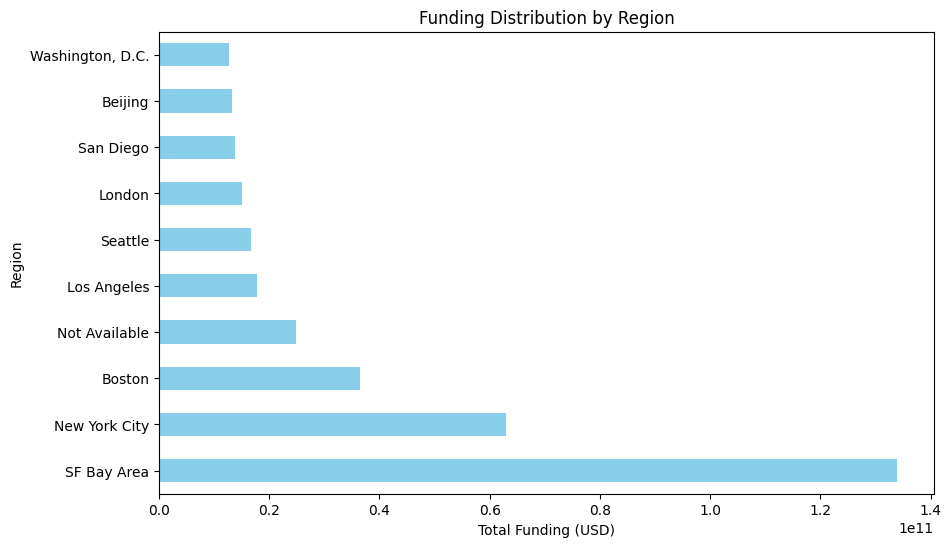

In [138]:
#Bias Analysis
region_funding = df.groupby('region')[' funding_total_usd '].sum().sort_values(ascending=False).head(10)
region_funding.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Funding Distribution by Region')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Region')
plt.show()

Insight:
1. The SF Bay Area dominates global startup funding, with approximately 140 billion USD, significantly outpacing other major tech hubs like New York City and Boston.
2. Geographical concentration is evident, with Silicon Valley and New York City attracting a disproportionate share of global startup funding.

<ipython-input-139-2c4d09423010>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='funding_rounds', y=' market ', data=top_funding_segments, palette='plasma')


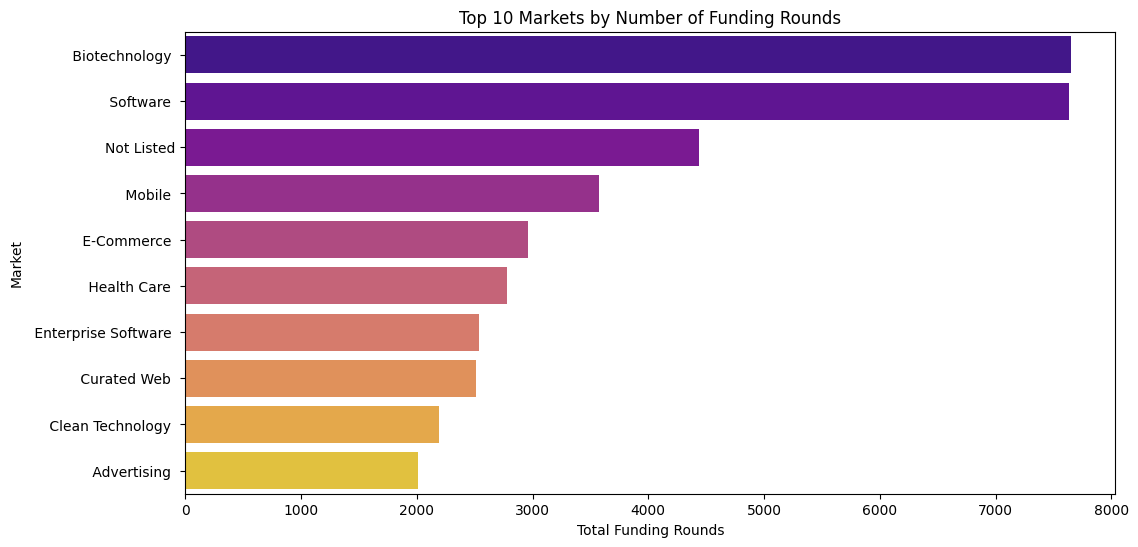

In [139]:
#Number of funding rounds in each segment
# Group by market and count funding rounds
funding_rounds_by_segment = df.groupby(' market ')['funding_rounds'].sum().reset_index()

# Top 10 markets by funding rounds
top_funding_segments = funding_rounds_by_segment.sort_values('funding_rounds', ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x='funding_rounds', y=' market ', data=top_funding_segments, palette='plasma')
plt.title('Top 10 Markets by Number of Funding Rounds')
plt.xlabel('Total Funding Rounds')
plt.ylabel('Market')
plt.show()


Insight: Biotechnology market has received the highest number of funding rounds, with over 7,500 rounds, followed by Software with over 7,000 rounds, as Investors are more interested in these markets.

<Figure size 1200x600 with 0 Axes>

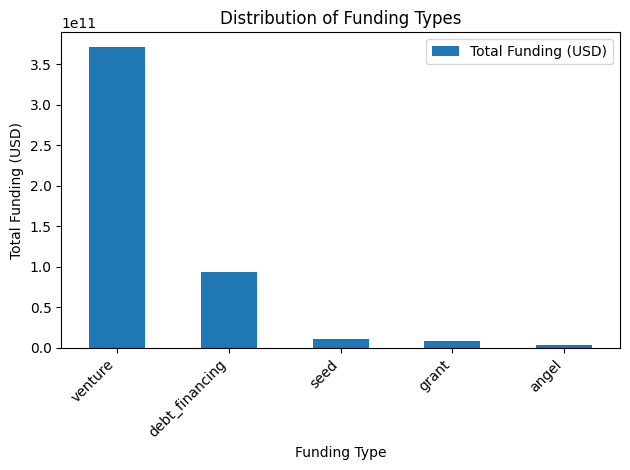

In [140]:
# Most common funding types in certain sectors
# Calculate total funding for each type
funding_types = ['seed', 'venture', 'angel', 'grant', 'debt_financing']
funding_type_totals = [df[funding_type].sum() for funding_type in funding_types]

# Create a DataFrame for the plot
funding_types_df = pd.DataFrame({
    'Funding Type': funding_types,
    'Total Funding (USD)': funding_type_totals
})

# Visualization
plt.figure(figsize=(12, 6))
funding_types_df.sort_values('Total Funding (USD)', ascending=False).plot(x='Funding Type', y='Total Funding (USD)', kind='bar')
plt.title('Distribution of Funding Types')
plt.xlabel('Funding Type')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insight: Venture funding dominates with a total funding of approximately $3.7 billion, significantly surpassing other funding types like debt financing, seed funding, grants, and angel funding.

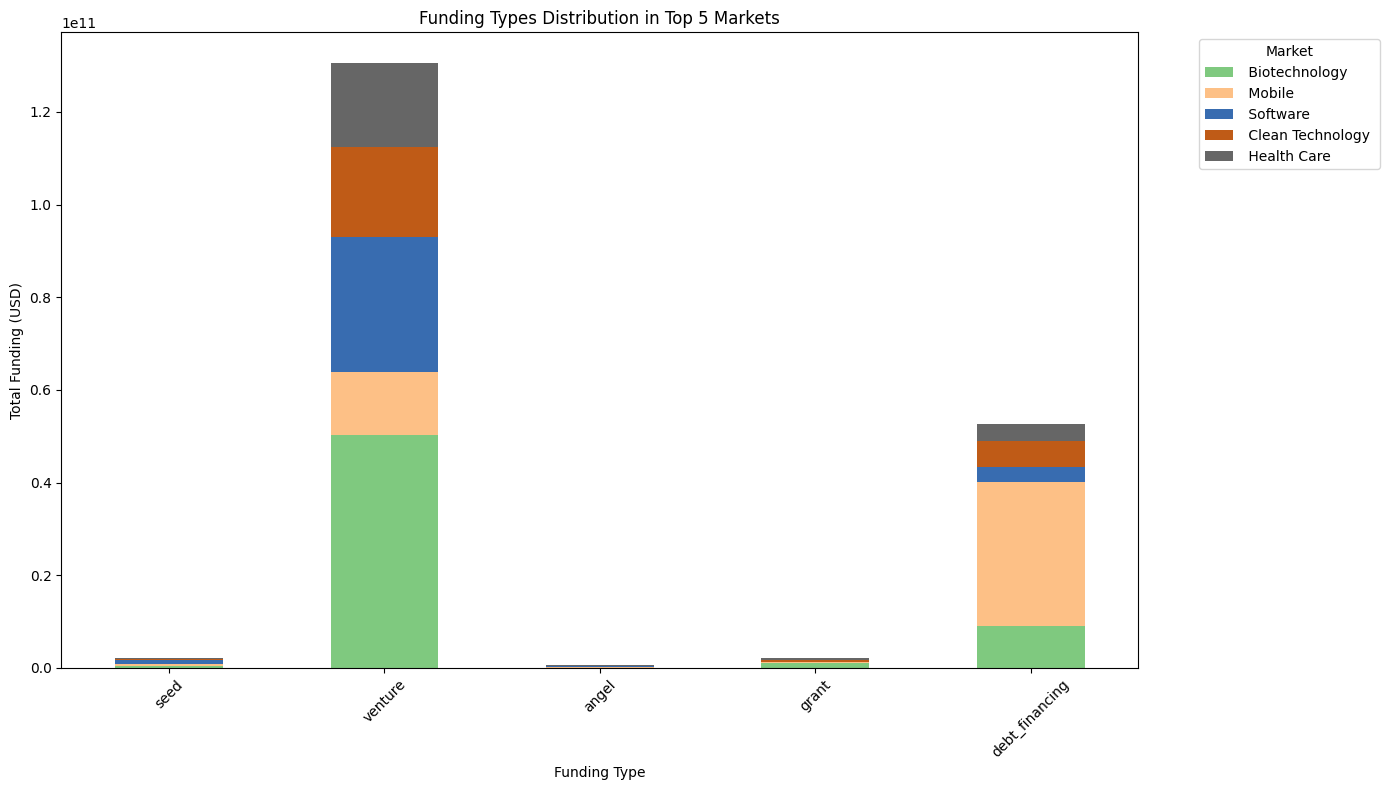

In [141]:
# Most Common Funding Types in Certain Sectors
# Aggregate funding types for each market
funding_types_by_market = df.groupby(' market ')[['seed', 'venture', 'angel', 'grant', 'debt_financing']].sum()

# Filter top 5 markets
top_markets = funding_types_by_market.sum(axis=1).sort_values(ascending=False).head(5)
top_markets_data = funding_types_by_market.loc[top_markets.index]

# Visualization
top_markets_data.T.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Accent')
plt.title('Funding Types Distribution in Top 5 Markets')
plt.xlabel('Funding Type')
plt.ylabel('Total Funding (USD)')
plt.xticks(rotation=45)
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insight: Venture funding dominates in the top 5 markets, particularly in Biotechnology, with a total funding of approximately 1.1 billion, followed by Software with around $0.9 billion.

count    4.943800e+04
mean     1.793292e+06
std      2.952893e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.500000e+09
Name: equity_ratio, dtype: float64


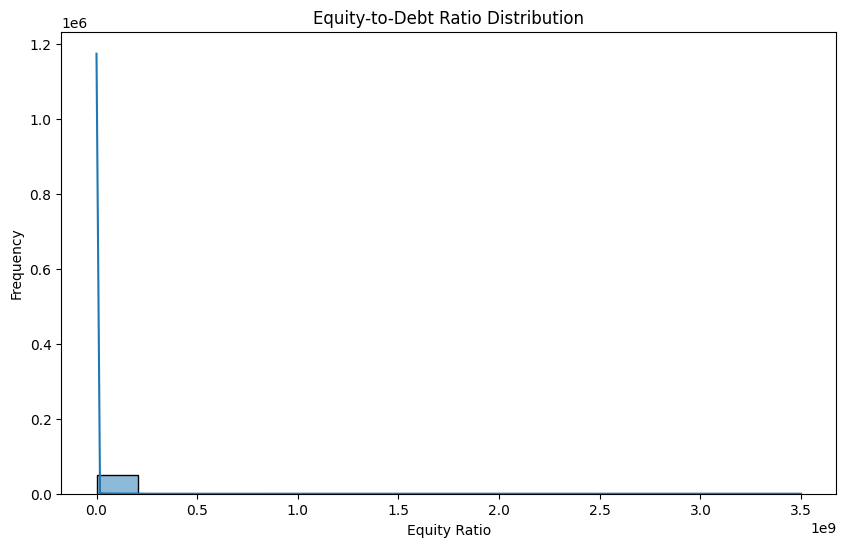

In [142]:
# Calculate equity-to-debt ratio
df['equity_ratio'] = df['private_equity'] / (df['debt_financing'] + 1)
print(df['equity_ratio'].describe())
# Visualization
plt.figure(figsize=(10, 6))
sns.histplot(df['equity_ratio'],kde = True)
plt.title('Equity-to-Debt Ratio Distribution')
plt.xlabel('Equity Ratio')
plt.ylabel('Frequency')
plt.show()

The key insights from this data are:

The distribution is highly skewed, with a large peak at 0, meaning a significant number of startups have no equity financing at all and are completely debt-financed.
There is a wide range of equity-to-debt ratios, from 0 to over 7 million, suggesting a diverse mix of financing strategies across the startups.
The median and 75th percentile being at 0 indicate that more than half the startups have very low or no equity financing.

This implies that the startup funding landscape is dominated by debt-heavy financing structures, with a smaller number of startups relying more heavily on equity.

In [143]:
# Compare Round B and Round A funding
round_b_greater_a = (df['round_B'] > df['round_A']).mean()

print(f"Percentage of startups where Round B funding is greater than Round A: {round_b_greater_a * 100:.2f}%")


Percentage of startups where Round B funding is greater than Round A: 9.84%


Insight: The analysis shows that, a relatively small portion of startups have a higher Round B funding compared to Round A, which indicate lower investor confidence, a cautious funding strategy or difficulties in getting to Series B.

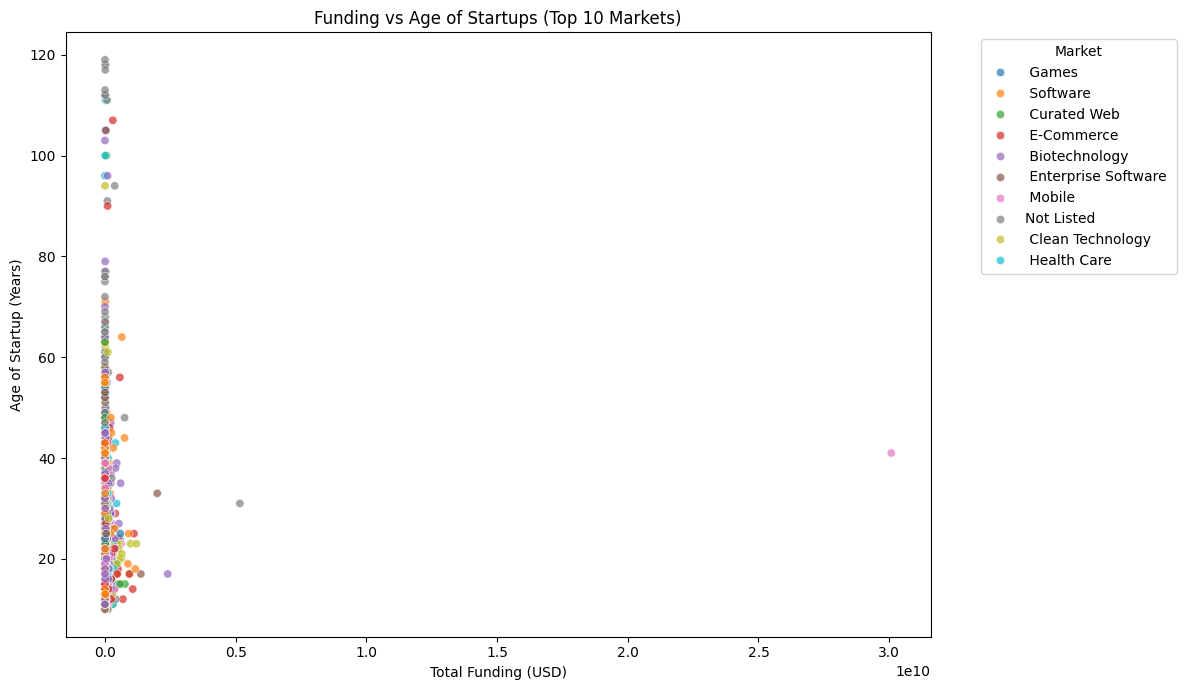

In [144]:
# Get the top 10 markets by frequency
top_10_markets = df[' market '].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 markets
df_top_markets = df[df[' market '].isin(top_10_markets)]

# Create the scatter plot
plt.figure(figsize=(12, 7))
sns.scatterplot(x=' funding_total_usd ', y='Age_of_startup', data=df_top_markets, alpha=0.7, hue=' market ', palette='tab10')
plt.title('Funding vs Age of Startups (Top 10 Markets)')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Age of Startup (Years)')
plt.legend(title='Market', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insight: The scatter plot reveals a correlation between funding and age. Startups with higher funding, often exceeding 10 million, tend to be older, with some surpassing 100 years. However, there's a cluster of younger startups, less than 10 years old, securing funding below $10 million. This suggests that while funding can contribute to longevity, it's not the sole determinant.

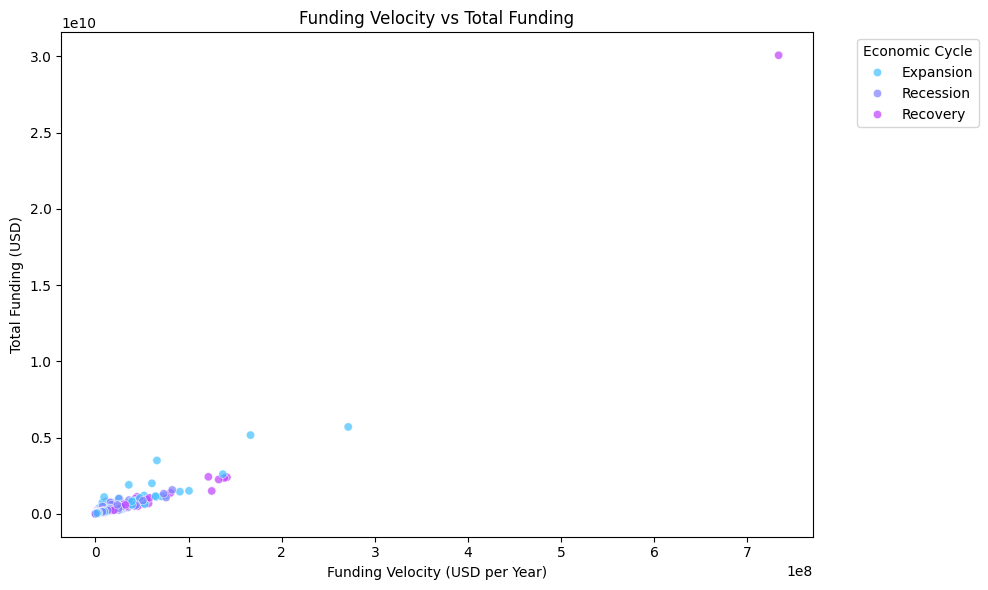

In [145]:
#Trend Between Funding Velocity and Total Funding
# Scatter plot for funding velocity vs total funding
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Funding_velocity', y=' funding_total_usd ', data=df, alpha=0.7, hue='economic_cycle', palette='cool')
plt.title('Funding Velocity vs Total Funding')
plt.xlabel('Funding Velocity (USD per Year)')
plt.ylabel('Total Funding (USD)')
plt.legend(title='Economic Cycle', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Insight: The scatter plot reveals a positive correlation between funding velocity and total funding. Startups with higher funding velocities, exceeding 100 million USD per year, tend to secure more total funding, often surpassing 10 billion USD. However, startups with lower funding velocities, below 100 million USD per year, and total funding below 10 billion USD also exist. This suggests that while a higher funding velocity can contribute to increased total funding, other factors like market demand and team experience also influence a startup's success. Additionally, economic cycles impact funding velocity and total funding, with expansion periods generally leading to higher values.

##  Statistical Testing

In [146]:
from scipy.stats import ttest_ind

us_funding = df[df['country_code'] == 'USA'][' funding_total_usd ']
non_us_funding = df[df['country_code'] != 'USA'][' funding_total_usd ']

t_stat, p_value = ttest_ind(us_funding, non_us_funding, nan_policy='omit')
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Observation
if p_value < 0.05:
    print("Significant difference in funding between US and non-US startups.")
else:
    print("No significant difference in funding between US and non-US startups.")

T-Statistic: 5.057601708836089, P-Value: 4.260772022422439e-07
Significant difference in funding between US and non-US startups.


Insight: A low p-value (< 0.05) indicates significant differences in funding between US and non-US startups.



In [154]:
#Test Whether Specific Markets Receive Significantly Higher Funding Than Others
from scipy.stats import ttest_ind

# Extract funding data for specific markets
software_funding = df[df[' market '] == 'Software'][' funding_total_usd ']
ecommerce_funding = df[df[' market '] == 'E-Commerce'][' funding_total_usd ']

# Perform t-test
t_stat, p_value = ttest_ind(software_funding, ecommerce_funding, nan_policy='omit')

# Observation
if p_value < 0.05:
    print("Significant difference in funding between Software and E-Commerce markets.")
else:
    print("No significant difference in funding between Software and E-Commerce markets.")


No significant difference in funding between Software and E-Commerce markets.


In [148]:
#Test Whether Startups in Urban Regions Receive More Funding Than Those in Rural Regions
# Define urban and rural cities
urban_cities = ['SF Bay Area', 'New York City', 'London', 'Boston']
df['region_type'] = df['city'].apply(lambda x: 'Urban' if x in urban_cities else 'Rural')

# Perform t-test
urban_funding = df[df['region_type'] == 'Urban'][' funding_total_usd ']
rural_funding = df[df['region_type'] == 'Rural'][' funding_total_usd ']

t_stat, p_value = ttest_ind(urban_funding, rural_funding, nan_policy='omit')
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Observation
if p_value < 0.05:
    print("Significant difference in funding between Urban and Rural regions.")
else:
    print("No significant difference in funding between Urban and Rural regions.")

T-Statistic: -0.7030947579620268, P-Value: 0.4820000097168825
No significant difference in funding between Urban and Rural regions.


In [149]:
#Test the Impact of Funding Type on Total Funding
venture_funding = df[df['venture'] > 0][' funding_total_usd ']
debt_funding = df[df['debt_financing'] > 0][' funding_total_usd ']

# Perform t-test
t_stat, p_value = ttest_ind(venture_funding, debt_funding, nan_policy='omit')
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

# Observation
if p_value < 0.05:
    print("Significant difference in total funding between venture and debt financing.")
else:
    print("No significant difference in total funding between venture and debt financing.")


T-Statistic: -6.741703977651515, P-Value: 1.5963452598700614e-11
Significant difference in total funding between venture and debt financing.


In [150]:
#Test if Startups Founded in Different Economic Cycles Receive Different Levels of Funding
# Define economic cycles (example years for illustration)
from scipy.stats import f_oneway

# Extract funding data for each economic cycle
expansion_funding = df[df['economic_cycle'] == 'Expansion'][' funding_total_usd '].dropna()
recession_funding = df[df['economic_cycle'] == 'Recession'][' funding_total_usd '].dropna()
recovery_funding = df[df['economic_cycle'] == 'Recovery'][' funding_total_usd '].dropna()

# Perform one-way ANOVA
f_stat, p_value = f_oneway(expansion_funding, recession_funding, recovery_funding)

# Print the results
print(f"F-Statistic: {f_stat:.4f}, P-Value: {p_value:.4f}")

# Observation
if p_value < 0.05:
    print("Significant differences in funding between economic cycles.")
else:
    print("No significant differences in funding between economic cycles.")



F-Statistic: 1.8294, P-Value: 0.1605
No significant differences in funding between economic cycles.


In [151]:
#We test whether the average funding for Niche segments differs significantly from Generalist segments.
from scipy.stats import ttest_ind

# Funding for Niche and Generalist segments
niche_funding_data = df[df['segment_type'] == 'Niche'][' funding_total_usd '].dropna()
generalist_funding_data = df[df['segment_type'] == 'Generalist'][' funding_total_usd '].dropna()

# Perform t-test
t_stat, p_value = ttest_ind(niche_funding_data, generalist_funding_data, nan_policy='omit')
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# Observation
if p_value < 0.05:
    print("Significant difference in funding between Niche and Generalist segments.")
else:
    print("No significant difference in funding between Niche and Generalist segments.")


T-Statistic: -0.3696, P-Value: 0.7117
No significant difference in funding between Niche and Generalist segments.


#Insights

Observations :
1. There are total 49436 unique permalink.
2. There are 49350 unique names of the startup in the dataset.
3. There are 753 unique market listed in the dataset.
4. There are 1089 unique regions mentioned in the dataset.
5. The dataset needs data cleaning as we can see the there are hyphens(garbage value) present in the columns.

Insights:
1. Categories like Biotechnology, Mobile, Clean Technology, Software often top funding charts by Total funding, highlighting investor focus on technology-driven industries. The most funding is done for Biotechnology about 70 Billion Dollars.
2. Categories like Trading, Payments, Communities, college, students, social media often top funding charts by Average funding. The most avg funding is done for Trading & Payments about 3.5 Billion dollars.
3. Markets such as Biotechnology, Mobile, Clean Technology, Software are among the most funded, reflecting their critical importance during recent economic trends. Biotechnology market has funded the most about 73 Billion dollars.
4. The most striking insight is the dramatic surge in startup formation and funding post-1980s, with the peak funding reaching approximately 10 billion dollars (10^10) for top performers, particularly in Mobile and Biotechnology sectors, while the majority of startups receive funding between 1 million dollars(10^6) and 100 million dollars(10^8), demonstrating a significant expansion in the startup ecosystem during this four-decade period (1980-2020).
5. Startup funding experienced a dramatic surge around 2000-2005, reaching a peak of approximately 50 billion, followed by significant volatility, aligning with the dot-com bubble and subsequent recovery.
6. Prior to the late 1980s, startup funding was minimal, indicating a significant shift in the investment landscape over the past few decades.
7. Startup funding exhibits a strong correlation with economic cycles, peaking during Recovery periods (approximately 55 billion) and reaching its lowest point during Recession periods (25 billion).
8. Before 1990, funding activity across all economic cycles was minimal, highlighting the significant growth and volatility of the startup funding landscape in recent decades.
9. The distribution of funding velocity is highly skewed, with the majority of startups (approximately 700,000) having near-zero funding velocity.
10. Only a small fraction of startups achieve rapid funding acceleration, with the maximum funding velocity reaching around 7x10^8 USD per year.
11. Average funding for Niche segments: 9,399,979.49
12. Average funding for Generalist segments: 13,183,965.45
13. While both niche and generalist segments have similar median funding levels, generalist segments exhibit a wider range of funding amounts, with some outliers reaching significantly higher values (up to 30 billion USD).
14. Niche segments tend to have a more concentrated funding distribution, with fewer high-value outliers and a maximum funding level around 1 billion USD.
15. Startup survival probability decreases significantly after each funding round, with a sharp drop after the first round and continuing decline until around the fifth round.
16. The majority of startups fail to secure continued funding beyond the early stages, with only a small fraction surviving past 10 funding rounds.
17. The SF Bay Area dominates global startup funding, with approximately 140 billion USD, significantly outpacing other major tech hubs like New York City and Boston.
18. Geographical concentration is evident, with Silicon Valley and New York City attracting a disproportionate share of global startup funding.
19. Biotechnology market has received the highest number of funding rounds, with over 7,500 rounds, followed by Software with over 7,000 rounds, as Investors are more interested in these markets.
20. Venture funding dominates with a total funding of approximately 3.7 billion, significantly surpassing other funding types like debt financing, seed funding, grants, and angel funding.
21. Venture funding dominates in the top 5 markets, particularly in Biotechnology, with a total funding of approximately 1.1 billion, followed by Software with around 0.9 billion.
22. The distribution is highly skewed, with a large peak at 0, meaning a significant number of startups have no equity financing at all and are completely debt-financed. There is a wide range of equity-to-debt ratios, from 0 to over 7 million, suggesting a diverse mix of financing strategies across the startups. The median and 75th percentile being at 0 indicate that more than half the startups have very low or no equity financing. This implies that the startup funding landscape is dominated by debt-heavy financing structures, with a smaller number of startups relying more heavily on equity.
23. The analysis shows that, a relatively small portion of startups have a higher Round B funding compared to Round A, which indicate lower investor confidence, a cautious funding strategy or difficulties in getting to Series B.
24. The scatter plot reveals a correlation between funding and age. Startups with higher funding, often exceeding 10 million, tend to be older, with some surpassing 100 years. However, there's a cluster of younger startups, less than 10 years old, securing funding below $10 million. This suggests that while funding can contribute to longevity, it's not the sole determinant.
25. The scatter plot reveals a positive correlation between funding velocity and total funding. Startups with higher funding velocities, exceeding 100 million USD per year, tend to secure more total funding, often surpassing 10 billion USD. However, startups with lower funding velocities, below 100 million USD per year, and total funding below 10 billion USD also exist. This suggests that while a higher funding velocity can contribute to increased total funding, other factors like market demand and team experience also influence a startup's success. Additionally, economic cycles impact funding velocity and total funding, with expansion periods generally leading to higher values.

Statistical Testing :
1. A low p-value (< 0.05) indicates significant differences in funding between US and non-US startups.
2. No significant difference in funding between Software and E-Commerce markets.
3. No significant difference in funding between Urban and Rural regions.
4. Significant difference in total funding between venture and debt financing.
5. No significant differences in funding between economic cycles.
6. No significant difference in funding between Niche and Generalist segments.

#Recommendations:

###1. Portfolio Diversification:

**Recommendation:** Diversify investment portfolios across multiple high-potential sectors, such as Biotechnology, Mobile, and Software. These sectors have consistently received the highest funding levels, indicating strong investor interest and growth potential.

**Rationale:** Diversifying across sectors helps mitigate risk and capture opportunities in fast-moving, technology-driven industries.


###2. Geographic Expansion:

**Recommendation:** Explore investment opportunities outside the traditional startup hubs of the SF Bay Area and New York City. Consider incentivizing entrepreneurship in other regions to identify and support promising startups in emerging markets.

**Rationale:** The data shows a significant funding concentration in Silicon Valley and NYC. Expanding into other regions can provide access to untapped talent and innovative ideas, potentially yielding higher returns.


###3. Targeted Funding Strategies:

**Recommendation:** Develop tailored programs and resources to help startups navigate the critical early funding rounds. Focus on supporting startups through the sharp drop-off in survival rates after the first few rounds.

**Rationale:** The Kaplan-Meier Survival Curve highlights the challenges startups face in securing continued funding, especially after the initial rounds. Targeted interventions can improve sustainability and increase the likelihood of successful exits.


###4. Niche Segment Support:

**Recommendation:** Allocate a portion of investment capital to support niche/specialized startups, as they appear to receive lower funding compared to generalist segments, despite potentially filling important market gaps.

**Rationale:** Niche startups may offer unique value propositions and opportunities for differentiation. Providing tailored support and funding can help these companies thrive and diversify the investment portfolio.


###5. Economic Cycle Responsiveness:

**Recommendation:** Closely monitor economic cycles and be prepared to adjust investment strategies accordingly. Allocate more resources during recovery periods when funding tends to surge, and maintain a more conservative approach during recessions.

**Rationale:** The data shows a strong correlation between funding levels and economic cycles, with recovery periods experiencing the highest funding peaks. Adaptability to these trends can improve investment timing and returns.


###6. Financing Structure Analysis:

**Recommendation:** Investigate ways to encourage a more balanced debt-to-equity financing structure among startups, as the current landscape appears heavily skewed towards debt-heavy models.

**Rationale:** The insights suggest the startup funding landscape is dominated by debt-heavy financing, which may impact long-term sustainability and growth. Identifying optimal financing structures can lead to better-capitalized and resilient startups.